In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

TensorFlow 1.x selected.


0.9851428571428571
0.98


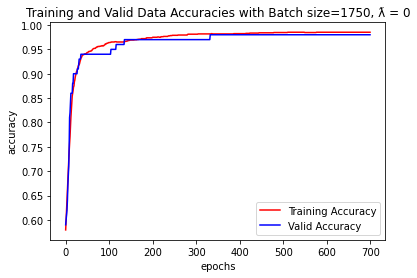

give me everything tonight


In [ ]:
def data():
    with np.load('notMNIST.npz') as data :
        Data, Target = data ['images'], data['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(521)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, trainTarget, validData, validTarget, testData, testTarget

def accuracy_cal(pred,y):
  pred = pred>=0.5
  return np.mean(pred==y)

def buildGraph(minibatch):
  w = tf.Variable(tf.random.truncated_normal((784, 1),0.0,0.5))
  b = tf.Variable(0.0)
  l = 0

  x = tf.placeholder(tf.float32, (minibatch, 784), name='X')
  y = tf.placeholder(tf.float32, (minibatch, 1), name='Y')

  z = tf.matmul(x,w) + b
  x_pred = tf.sigmoid(z)
  x_loss = tf.losses.sigmoid_cross_entropy(y, x_pred)
  reg = tf.nn.l2_loss(w)
  x_loss += l/2*reg

  optiAndMini = tf.train.AdamOptimizer(0.001).minimize(x_loss)

  return w, b, x, x_pred, y, x_loss, optiAndMini

minibatch = 1750
epochs = 700
batch_num = 3500/minibatch
w, b, x, x_pred, y, x_loss, optiAndMini = buildGraph(minibatch)
l = 0

valid_data = tf.placeholder(tf.float32, (100, 784), name='VD')
valid_target = tf.placeholder(tf.int8, (100, 1), name='VT')

test_data = tf.placeholder(tf.float32, (145, 784), name='TD')
test_target = tf.placeholder(tf.int8, (145, 1), name='TT')

valid_pred = tf.sigmoid(tf.matmul(valid_data, w)+b)
test_pred = tf.sigmoid(tf.matmul(test_data, w)+b)

valid_loss = tf.losses.sigmoid_cross_entropy(valid_target, valid_pred) + l/2*tf.nn.l2_loss(w)
test_loss =  tf.losses.sigmoid_cross_entropy(test_target, test_pred) + l/2*tf.nn.l2_loss(w)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

x_losses = []
x_accuracy = []

v_losses = []
v_accuracy = []

t_losses = []
t_accuracy = []

trainData, trainTarget, validData, validTarget, testData, testTarget = data()
trainData = trainData.reshape((trainData.shape[0], trainData.shape[1]*trainData.shape[2]))
validData = validData.reshape((validData.shape[0],validData.shape[1]*validData.shape[2])) 
testData = testData.reshape((testData.shape[0],testData.shape[1]*testData.shape[2]))

for i in range(epochs):
  index = np.random.permutation(np.shape(trainTarget)[0])
  x_shuffled,y_shuffled = trainData[index], trainTarget[index]
  for batch in range(int(batch_num)):
    xBatch = x_shuffled[i:(i + minibatch),:] 
    yBatch = y_shuffled[i:(i + minibatch),:]
    feedDict = {x: xBatch, y: yBatch, valid_data: validData, valid_target: validTarget, test_data: testData, test_target: testTarget}
    _, newW, newB, x_l, x_p, v_l, v_p, t_l, t_p = sess.run(
        [optiAndMini, w, b, x_loss, x_pred, valid_loss, valid_pred, test_loss, test_pred], feed_dict=feedDict)

  x_losses.append(x_l)
  v_losses.append(v_l)
  t_losses.append(t_l)
  x_accuracy.append(accuracy_cal(x_p, yBatch))
  v_accuracy.append(accuracy_cal(v_p, validTarget))
  t_accuracy.append(accuracy_cal(t_p, testTarget))

print(accuracy_cal(x_p, yBatch))
print(accuracy_cal(v_p, validTarget))
print(accuracy_cal(t_p, testTarget))

x_range = range(epochs)
#plt.plot(x_range, x_losses, 'r', x_range, v_losses, 'b')
#plt.xlabel('epochs')
#plt.ylabel('loss')
#plt.legend(["Training Loss","Valid Loss"],loc='upper right')
#plt.title("Training and Valid Data Losses with Batch Size=1750, ƛ = 0")
#plt.show()
plt.plot(x_range, x_accuracy, 'r', x_range, v_accuracy, 'b')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(["Training Accuracy","Valid Accuracy"], loc='lower right')
plt.title("Training and Valid Data Accuracies with Batch size=1750, ƛ = 0")
plt.show()